In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the cleaned DataFrame
cleaned_df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/cleaned_data.csv")

In [4]:
cleaned_df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [5]:
# print out the shape of this dataframe to note the number of samples

cleaned_df.shape

(28362, 17)

# K Means Clustering Without Scaling

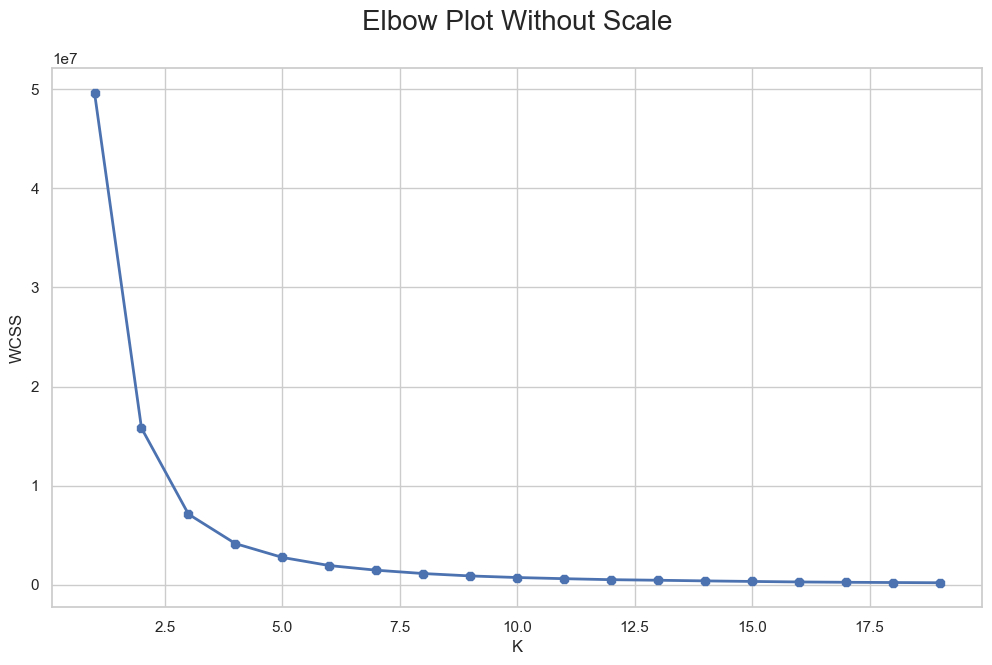

In [6]:
# create an Elbow Plot of WCSS

X1 = cleaned_df.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

sns.set(style='whitegrid') # to show gridlines
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot Without Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

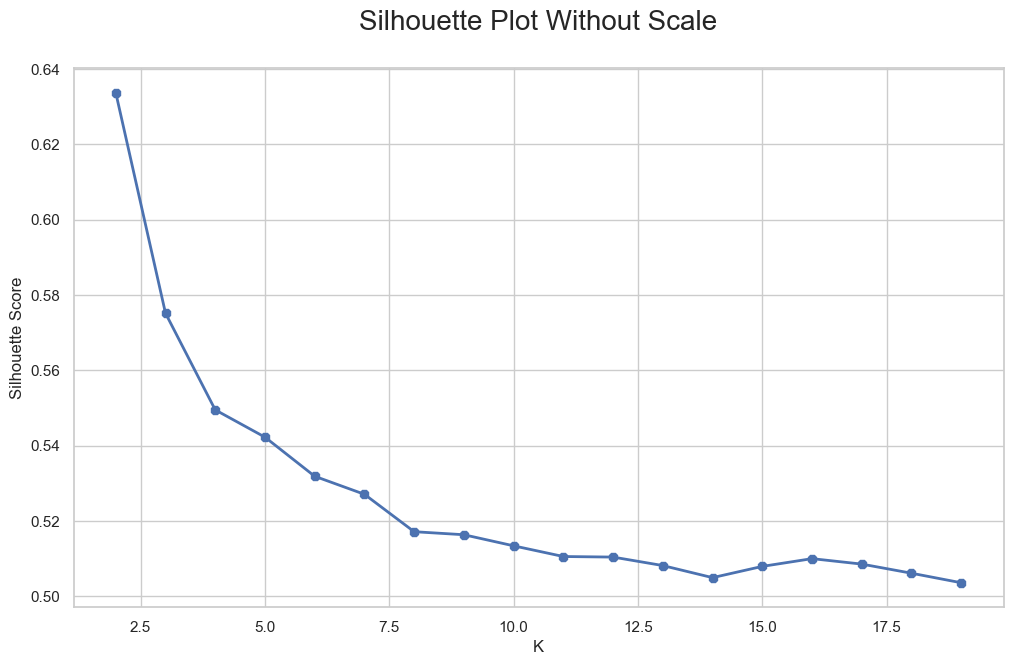

In [7]:
# create a plot of Silhoutte Score

silhouette = []
for k in range(2, 20):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhouette Plot Without Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

Based on both plots, the optimal number of clusters seems to be k=2, where the elbow occurs and the silhouette is closest to 1. 

In [48]:
# create a KMeans object with this optimal number of clusters. Name this object `kmeans`

kmeans = KMeans(n_clusters = 2, init='k-means++', random_state=42)

# fit this KMeans object using your `X1` data

kmeans.fit(X1)

KMeans(n_clusters=2, random_state=42)

In [50]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [51]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[5.33048398e+01, 2.17235562e-02, 1.13684578e-01, 1.30860407e-01,
        6.05778398e-02, 1.55403652e-02, 1.71149082e-02, 5.63898705e-02,
        7.94630507e-02, 6.02114814e-02, 6.51910069e-02, 4.21535954e-02,
        5.14958835e-02, 2.40541303e-02, 1.46501246e-01, 3.18133477e-02,
        4.58547046e-01],
       [1.33491185e+02, 1.92282656e-02, 1.32736019e-01, 9.07117330e-02,
        4.74802181e-02, 2.31747413e-02, 1.68310124e-02, 2.50315246e-02,
        6.80300967e-02, 2.10513434e-01, 4.43603824e-02, 6.35489124e-02,
        4.13822738e-02, 2.44634907e-02, 7.69898834e-02, 2.84874210e-02,
        3.22776879e-01]])

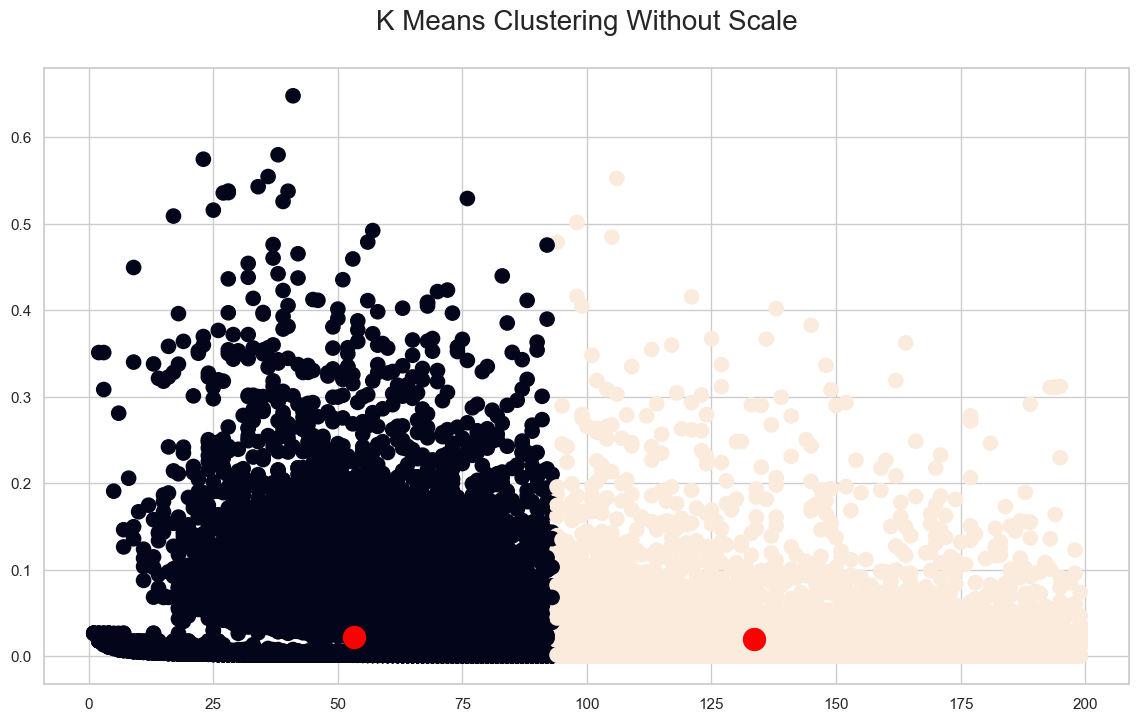

In [52]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering Without Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

I am unable to interpret this scatter plot. I know that it is applying KMeans clustering with k=2 but I do not know which two features it is using from the dataset. The red dots represent the cluster centroids and I can clearly see that the data has been grouped into two distinct clusters. 

# K Means Clustering with Scaling

In [53]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

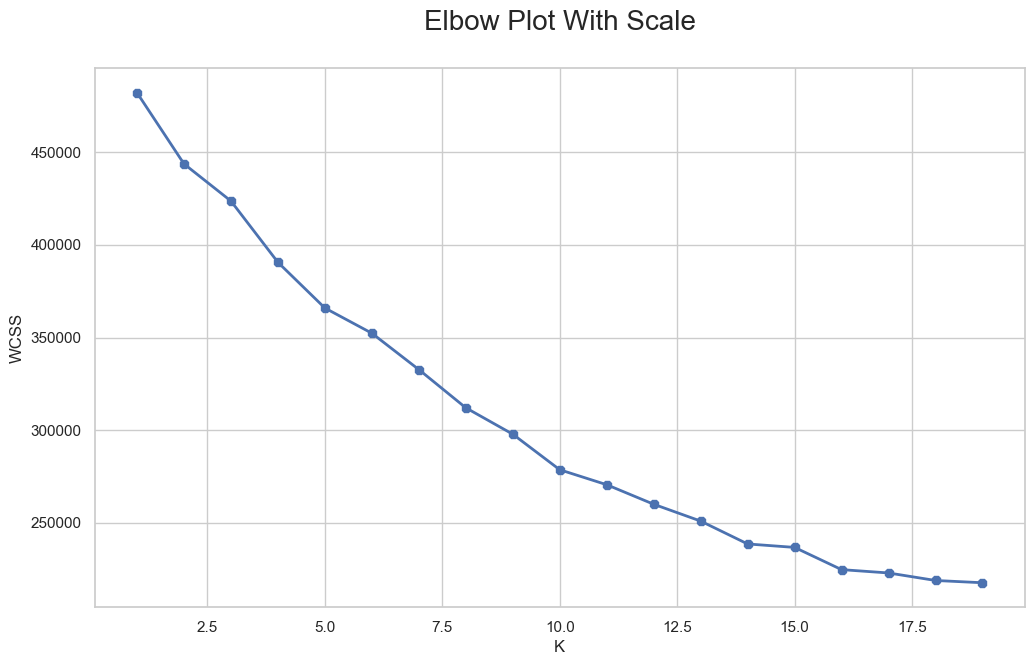

In [54]:
wcss_scaled = []
for k in range(1, 20):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')

    # fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot With Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

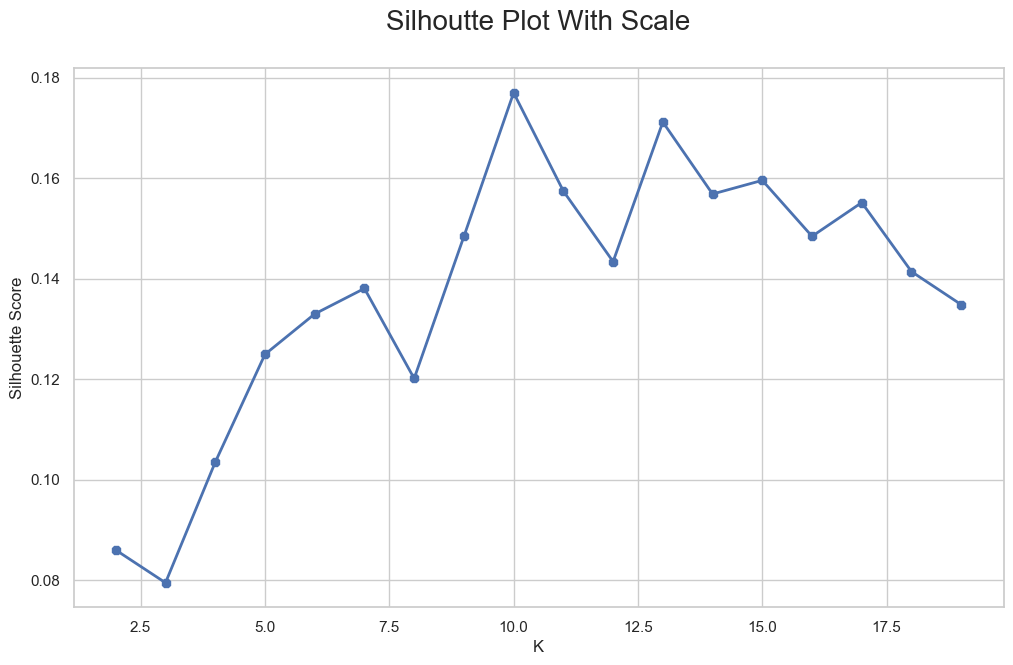

In [55]:
# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 20):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot With Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

While the Elbow Plot shows a k of approximately 4 or 5, the Silhouette Plots shows a k of approximately 10. I tend to lean towards Silhouette Plots more than Elbows, so I will move forward with k = 10. 

In [56]:
# create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = KMeans(n_clusters =10, init='k-means++', n_init=20, random_state=42)

# fit this KMeans object on your data

kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=10, n_init=20, random_state=42)

In [57]:
#nGenerate labels for the  dataset

labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([3, 8, 2, ..., 7, 7, 7], dtype=int32)

In [58]:
# output the centroids of your clusters

kmeans_scaled.cluster_centers_

array([[-1.36024718e-01, -2.23304229e-01,  2.86833893e-01,
         1.29743955e-01, -2.24108543e-01, -1.47716598e-01,
         2.81538799e-02, -2.47188400e-01, -3.20370388e-01,
        -2.81943402e-01, -5.38112300e-02, -2.22281467e-01,
        -1.12570099e-01,  3.73239705e+00, -1.96945298e-01,
        -1.62502237e-01,  9.74474859e-02],
       [ 5.10491754e-02, -1.54684662e-01,  1.78276544e+00,
        -3.85880766e-01, -2.33547586e-01, -1.79080859e-01,
        -2.59556185e-02, -2.62563548e-01, -6.93448903e-03,
        -3.90675726e-01, -3.00536727e-01,  7.91931967e-02,
         1.40397416e-01, -7.46345179e-02, -4.19831927e-01,
        -1.58980953e-01, -2.44002793e-01],
       [-2.31272892e-01,  5.49478128e-02, -4.66607532e-01,
        -4.23852729e-01, -2.27037393e-01, -1.79902691e-01,
         1.12975287e-01, -2.02966601e-01, -1.23719598e-01,
        -3.92366493e-01,  2.86166202e+00,  9.26208840e-02,
         1.62189616e-01, -6.55887365e-02, -3.89248009e-01,
        -1.48208996e-01,  4.2

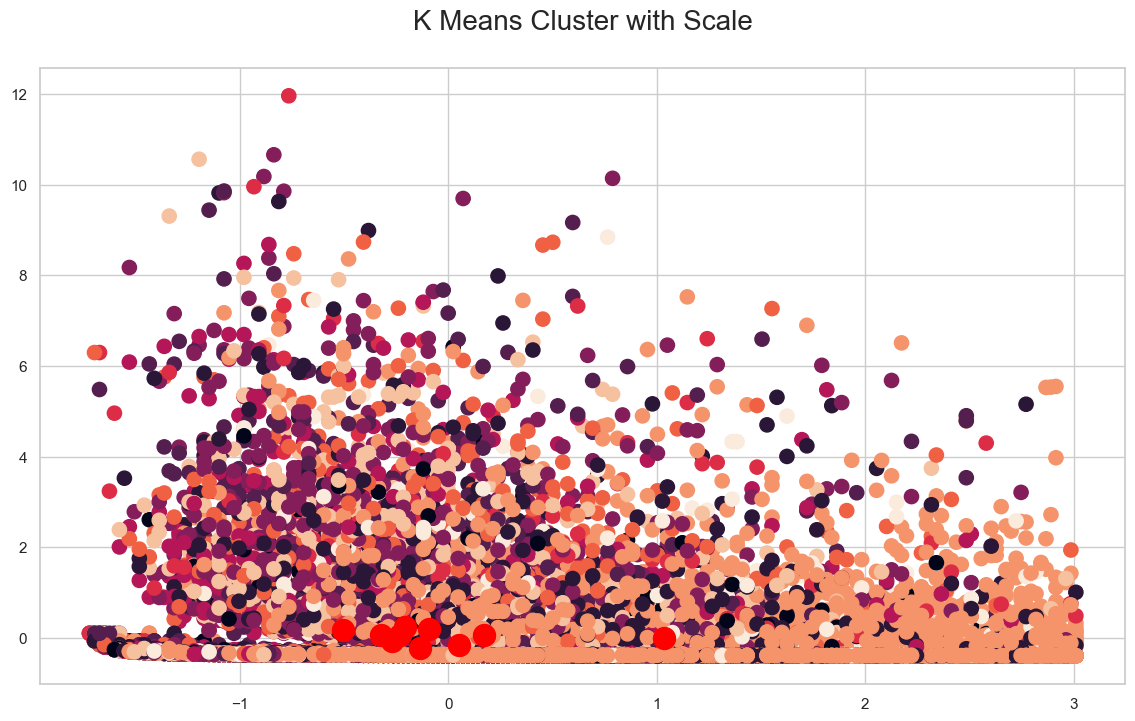

In [59]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Cluster with Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

With scaling, the 2D chart looks wholly unrecognizable from it's unscaled counterpart. This chart shows a lot of overlapping. The cluster centroids are recognizable, even though some seem to be overlapping as well. Each point represents a different song in its respective colored cluster. There isn't much more that I can gather from this chart, but that may be due to my untrained eye. 

# Principal Component Analysis (PCA)
PCA is a technique that is used to reduce dimensionality of a dataset by standardizing the data via its mean. 

In [62]:
# set PCA components and standardize data
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1_scaled)

# list original features
features = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic',
            'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual',
            'sadness', 'feelings', 'age']



In [64]:
# set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=10, init='k-means++', random_state=42)
clusters = kmeans_scaled.fit_predict(transformed_pca)

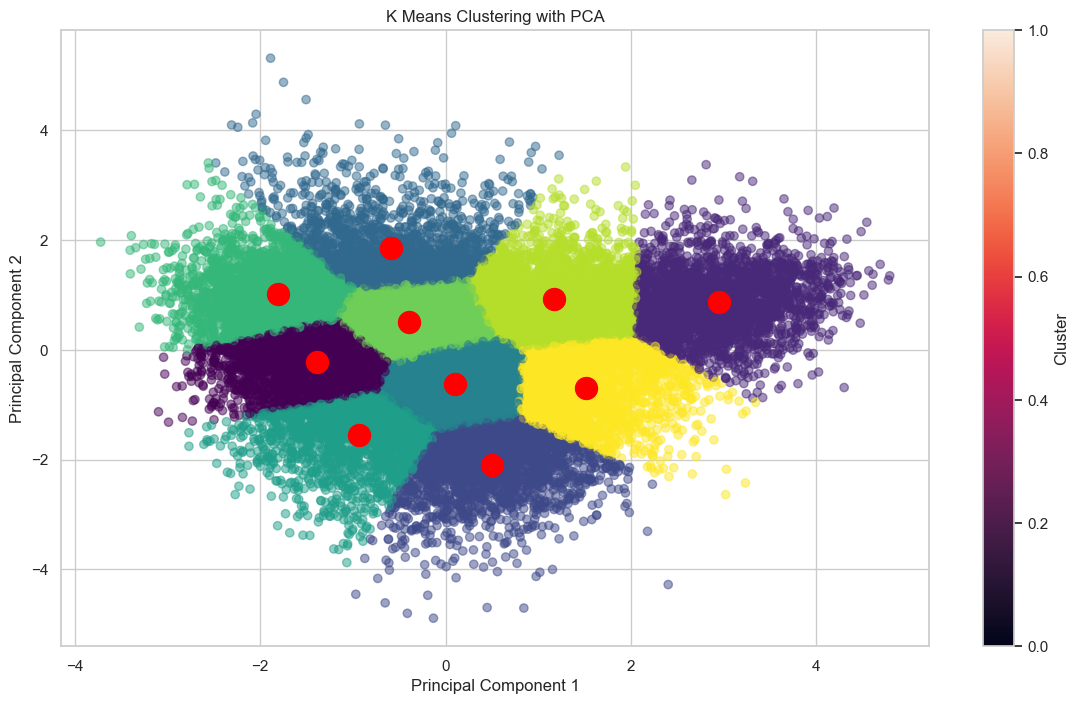

In [65]:
# plot PCA results

plt.figure(figsize=(14,8))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color='red', s=250)
plt.title('K Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

I used PCA to visualize the KMeans clustering of 10. The 17 dimensional feature was reduced to 2 dimensions (`n_components`), making it easier to see the 10 clusters discovered by KMeans.

Each point in the plot is a song. 
The different colors indicate the clusters that were assigned by KMeans.
The red dots represent the cluster centroids. 

In [66]:
# fit k=11 on scaled data and add "Cluster" column to cleaned dataset
kmeans_scaled = KMeans(n_clusters=10, random_state=42)
cleaned_df['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [67]:
# load raw data set, and combine with cleaned_df dataset (with the additional 'Cluster' column)
df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/train.csv")

label = df[['genre', 'artist_name', 'track_name', 'release_date']]

label = pd.concat([label, cleaned_df], axis=1)

label.head()

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0,9
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0,0
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0,4
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0,5
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0,5


In [68]:
# Get value count for each cluster
cleaned_df['Cluster'].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
0,4609
1,4069
2,1922
3,1863
4,2225
5,1642
6,4823
7,1012
8,965


Almost all clusters have a sizable set of songs, with the exception of Clusters 7 and 8.  

In [70]:
# Describe each cluster
# Create a DataFrame of cluster centers for better understanding

columns = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic',
           'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual',
           'sadness', 'feelings', 'age']

cluster_centers = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=columns)
cluster_centers.index = [f"Cluster {i}" for i in range(len(cluster_centers))]

cluster_centers

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
Cluster 0,-0.279532,-0.204024,-0.423973,1.804970,-0.223245,-0.187878,-0.027223,-0.172999,0.076671,-0.410779,-0.252841,-0.270492,0.092867,0.134935,-0.348382,0.010918,0.096045
Cluster 1,1.112573,-0.109584,-0.345099,-0.444395,-0.275795,0.024003,0.037099,-0.330266,-0.035335,2.061004,-0.301341,-0.004959,-0.232273,-0.135561,-0.567468,-0.111115,-0.497976
Cluster 2,0.130565,-0.226190,0.071081,-0.133593,-0.205787,-0.188922,-0.041175,-0.271927,-0.404937,-0.035315,-0.157277,2.815183,-0.224362,-0.107510,-0.263390,-0.061171,0.032544
Cluster 3,-0.202011,0.001552,-0.427096,-0.413630,3.047616,-0.086794,0.016815,-0.176206,0.039477,-0.352848,-0.240761,-0.147841,-0.055451,-0.143108,-0.392586,0.115819,0.091795
Cluster 4,-0.254002,-0.143525,-0.459534,-0.416747,-0.226869,-0.181376,0.115379,-0.199933,-0.099965,-0.388943,2.872722,-0.078785,0.199449,0.104727,-0.381430,-0.092882,0.424994
Cluster 5,-0.515301,-0.034909,-0.514218,-0.307530,-0.169022,-0.159088,-0.006437,3.364072,0.037960,-0.455834,-0.172656,-0.308092,0.109737,-0.157433,-0.301694,-0.038318,0.637372
Cluster 6,0.030104,-0.232187,1.791821,-0.372321,-0.231569,-0.180454,-0.012040,-0.259392,0.008827,-0.389303,-0.297320,-0.237930,0.157353,0.223845,-0.413396,-0.074406,-0.256010
Cluster 7,-0.215173,4.010820,-0.347175,-0.180803,-0.002112,-0.016878,0.065493,0.029754,-0.258295,-0.163895,-0.056503,-0.314292,-0.300712,-0.208955,-0.034592,0.311097,0.295722
Cluster 8,0.158213,-0.040302,-0.038331,-0.115854,-0.125547,4.012470,-0.024913,-0.183304,-0.234610,0.125266,-0.186762,-0.220832,-0.248190,-0.098939,-0.222144,0.187611,-0.203240
Cluster 9,-0.340534,-0.134826,-0.453116,-0.375514,-0.211874,-0.196252,-0.039764,-0.131705,0.210187,-0.426325,-0.247392,-0.287170,0.040486,-0.065946,1.670842,0.083369,0.093591


This is a quick peek into the top 3 features of each cluster.

***Cluster 0***
+ world/life
+ family/spiritual
+ light/visual perceptions

***Cluster 1***
+ obscene
+ len
+ communication

***Cluster 2***
+ movement/places
+ violence
+ len

***Cluster 3***
+ night/time
+ feelings
+ age

***Cluster 4***
+ music
+ age
+ light/visual perceptions

***Cluster 5***
+ romantic
+ age
+ communication

***Cluster 6***
+ violence
+ family/spiritual
+ light/visual perceptions

***Cluster 7***
+ dating
+ feelings
+ age

***Cluster 8***
+ shake the audience
+ feelings
+ obscene

***Cluster 9***
+ sadness
+ communication
+ age
---



***Songs in Cluster 0***
+ world/life
+ family/spiritual
+ light/visual perceptions

In [71]:
label[cleaned_df['Cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
8382,country,loggins & messina,good friend,1971,23,0.002392,0.002392,0.095266,0.002392,0.002392,...,0.305001,0.002392,0.002392,0.002392,0.002392,0.049311,0.002392,0.464472,0.700000,0
10801,country,kevin sharp,there's only you,1996,24,0.002288,0.002288,0.416170,0.002288,0.002288,...,0.002288,0.002288,0.002288,0.002288,0.002288,0.002288,0.270297,0.002288,0.342857,0
22127,reggae,311,life's not a race,1999,95,0.000877,0.000877,0.450264,0.092169,0.000877,...,0.123699,0.000877,0.024988,0.000877,0.128579,0.000877,0.036910,0.057579,0.300000,0
22277,reggae,soja,jah atmosphere,2002,50,0.001595,0.238175,0.341088,0.001595,0.001595,...,0.001595,0.001595,0.001595,0.001595,0.001595,0.053421,0.161654,0.001595,0.257143,0
11301,country,johnny cash,in my life,2002,45,0.001284,0.027815,0.428431,0.001284,0.001284,...,0.268045,0.001284,0.001284,0.001284,0.001284,0.001284,0.001284,0.057504,0.257143,0
17691,jazz,louis armstrong,be my life's companion,1964,58,0.001224,0.001224,0.766975,0.001224,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.066426,0.048459,0.001224,0.800000,0
24574,rock,amy grant,el-shaddai,1982,75,0.001754,0.001754,0.333958,0.001754,0.001754,...,0.001754,0.001754,0.001754,0.001754,0.243152,0.394820,0.001754,0.001754,0.542857,0
24549,rock,ozzy osbourne,believer,1981,53,0.030843,0.001422,0.308065,0.001422,0.001422,...,0.280566,0.001422,0.001422,0.001422,0.200596,0.053051,0.001422,0.001422,0.557143,0
4201,pop,anne murray,could i have this dance,1994,48,0.001170,0.001170,0.393867,0.137235,0.001170,...,0.001170,0.001170,0.068419,0.001170,0.284409,0.001170,0.001170,0.058826,0.371429,0
11555,country,randy rogers band,before i believe it's true,2006,65,0.038372,0.000822,0.387567,0.000822,0.098262,...,0.135856,0.000822,0.000822,0.000822,0.000822,0.048852,0.092199,0.000822,0.200000,0


***Songs in Cluster 1***
+ obscene
+ len
+ communication

In [93]:
label[cleaned_df['Cluster'] == 1].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
27890,hip hop,fat joe,lean back,2014,85,0.001012,0.001012,0.082014,0.001012,0.074166,...,0.065162,0.570902,0.001012,0.110747,0.001012,0.001012,0.001012,0.001012,0.085714,1
16567,blues,gov't mule,money,2014,75,0.001053,0.077660,0.048159,0.075845,0.036563,...,0.201129,0.315536,0.001053,0.135779,0.001053,0.001053,0.046715,0.052086,0.085714,1
8859,country,firefall,just think,1977,25,0.003759,0.003759,0.003759,0.003759,0.003759,...,0.331743,0.604347,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.614286,1
5954,pop,mac miller,senior skip day,2010,170,0.010416,0.000454,0.047399,0.047787,0.025688,...,0.000454,0.467698,0.000454,0.207263,0.000454,0.000454,0.055764,0.000454,0.142857,1
6539,pop,alessia cara,here,2015,110,0.000849,0.000849,0.000849,0.000849,0.000849,...,0.261104,0.463300,0.101314,0.000849,0.039345,0.035230,0.000849,0.000849,0.071429,1
6871,pop,kanye west,yikes,2018,144,0.000650,0.058709,0.000650,0.000650,0.000650,...,0.121089,0.670155,0.000650,0.000650,0.000650,0.014993,0.000650,0.000650,0.028571,1
1415,pop,joni mitchell,that song about the midway,1969,85,0.000975,0.170258,0.000975,0.044066,0.000975,...,0.000975,0.324503,0.201983,0.053946,0.070023,0.000975,0.000975,0.000975,0.728571,1
6658,pop,bruno mars,calling all my lovelies,2016,115,0.049080,0.000591,0.000591,0.000591,0.000591,...,0.243967,0.340155,0.151601,0.000591,0.000591,0.000591,0.017223,0.018306,0.057143,1
5073,pop,mark ronson,"ooh wee (feat. ghostface killah, nate dogg, tr...",2003,160,0.000786,0.052506,0.000786,0.000786,0.034090,...,0.054450,0.506907,0.030797,0.198688,0.000786,0.000786,0.000786,0.000786,0.242857,1
25370,rock,cypress hill,hand on the pump,1991,177,0.000554,0.228509,0.000554,0.000554,0.000554,...,0.000554,0.647153,0.000554,0.000554,0.000554,0.000554,0.000554,0.000554,0.414286,1


***Songs in Cluster 2***
+ movement/places
+ violence
+ len

In [94]:
label[cleaned_df['Cluster'] == 2]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
37,pop,t. m. soundararajan,ethanai periya,1953,74,0.001253,0.066192,0.335708,0.001253,0.027847,...,0.001253,0.001253,0.001253,0.382074,0.001253,0.055239,0.001253,0.001253,0.957143,2
49,pop,harry belafonte,mark twain,1954,64,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.002392,0.002392,0.378403,0.370635,0.115315,0.002392,0.002392,0.002392,0.942857,2
50,pop,harry belafonte,the next big river,1954,112,0.001645,0.375904,0.172299,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.238618,0.001645,0.001645,0.001645,0.001645,0.942857,2
65,pop,ted heath,take the “a” train,1956,199,0.000516,0.000516,0.000516,0.000516,0.000516,...,0.136611,0.304397,0.020922,0.483828,0.000516,0.000516,0.000516,0.000516,0.914286,2
83,pop,harry belafonte,matilda,1956,92,0.000822,0.031876,0.000822,0.000822,0.054284,...,0.000822,0.416615,0.109557,0.257021,0.000822,0.000822,0.000822,0.000822,0.914286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28318,hip hop,afroman,crazy rap (colt 45 & 2 zig zags),2019,140,0.027323,0.000572,0.000572,0.024718,0.000572,...,0.000572,0.364163,0.025880,0.287471,0.099398,0.000572,0.000572,0.000572,0.014286,2
28326,hip hop,big k.r.i.t.,king of the south,2019,68,0.001032,0.001032,0.052178,0.001032,0.001032,...,0.001032,0.354437,0.001032,0.420015,0.103657,0.001032,0.001032,0.001032,0.014286,2
28350,hip hop,nappy roots,blowin' trees,2019,74,0.001196,0.125810,0.353286,0.001196,0.001196,...,0.001196,0.040241,0.153930,0.207573,0.001196,0.001196,0.001196,0.001196,0.014286,2
28355,hip hop,nappy roots,country boyz,2019,109,0.000810,0.000810,0.000810,0.000810,0.000810,...,0.000810,0.394272,0.000810,0.515379,0.000810,0.000810,0.000810,0.000810,0.014286,2


***Songs in Cluster 3***
+ night/time
+ feelings
+ age

In [95]:
label[cleaned_df['Cluster'] == 3]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
11,pop,the chordettes,carolina moon,1951,38,0.001645,0.001645,0.001645,0.397490,0.001645,...,0.066201,0.001645,0.093699,0.001645,0.417938,0.001645,0.001645,0.001645,0.985714,3
25,pop,lata mangeshkar,paas nahin aaiye haath na lagaiye,1952,18,0.002924,0.002924,0.002924,0.319657,0.002924,...,0.002924,0.002924,0.260384,0.002924,0.002924,0.002924,0.199746,0.002924,0.971429,3
39,pop,andy williams,it's the most wonderful time of the year,1953,79,0.001253,0.060214,0.001253,0.323077,0.001253,...,0.001253,0.089849,0.260828,0.001253,0.086128,0.038310,0.001253,0.022646,0.957143,3
61,pop,les paul,sleep,1955,51,0.001253,0.001253,0.001253,0.326881,0.001253,...,0.001253,0.001253,0.135853,0.001253,0.160594,0.001253,0.191683,0.001253,0.928571,3
67,pop,bill haley & his comets,come rock with me,1956,103,0.001224,0.001224,0.001224,0.400464,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.077885,0.116306,0.001224,0.046509,0.914286,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27831,hip hop,rayess bek,baghdad,2013,62,0.001074,0.154305,0.309147,0.369730,0.001074,...,0.150707,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.100000,3
28039,hip hop,trina,100%,2017,75,0.001144,0.001144,0.001144,0.341296,0.044868,...,0.200939,0.186500,0.001144,0.001144,0.001144,0.001144,0.001144,0.029447,0.042857,3
28093,hip hop,vince staples,big fish,2017,59,0.001385,0.001385,0.001385,0.394986,0.001385,...,0.001385,0.171280,0.001385,0.277829,0.001385,0.001385,0.001385,0.001385,0.042857,3
28135,hip hop,kelly rowland,wonderful christmas time,2017,32,0.002770,0.002770,0.002770,0.608259,0.002770,...,0.002770,0.002770,0.064405,0.002770,0.069907,0.068149,0.002770,0.044116,0.042857,3


***Songs in Cluster 4***
+ music
+ age
+ light/visual perceptions

In [96]:
label[cleaned_df['Cluster'] == 4]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,4
16,pop,les paul,blue skies,1951,43,0.001385,0.001385,0.001385,0.065507,0.001385,...,0.001385,0.001385,0.600633,0.001385,0.249154,0.001385,0.001385,0.063931,0.985714,4
23,pop,les paul,smoke rings,1952,35,0.001645,0.001645,0.001645,0.001645,0.001645,...,0.001645,0.128530,0.365303,0.001645,0.256757,0.001645,0.071715,0.001645,0.971429,4
24,pop,mukesh,hum tujhse mohabbat kar ke,1952,73,0.000810,0.000810,0.000810,0.000810,0.000810,...,0.033341,0.000810,0.383721,0.000810,0.144411,0.000810,0.000810,0.083152,0.971429,4
26,pop,lata mangeshkar,main na janoon,1952,38,0.045052,0.002105,0.002105,0.002105,0.002105,...,0.046168,0.002105,0.555732,0.002105,0.260367,0.002105,0.002105,0.002105,0.971429,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27978,hip hop,fumez the engineer,pull up hop out bang,2016,118,0.000684,0.262988,0.000684,0.051223,0.000684,...,0.000684,0.000684,0.414587,0.000684,0.079075,0.018756,0.085033,0.000684,0.057143,4
28041,hip hop,audio two,make it funky,2017,82,0.001253,0.001253,0.001253,0.088804,0.001253,...,0.191160,0.001253,0.476353,0.001253,0.001253,0.053344,0.001253,0.001253,0.042857,4
28104,hip hop,shonlock,boggie bounce,2017,98,0.000731,0.089705,0.000731,0.000731,0.000731,...,0.420820,0.000731,0.357358,0.000731,0.046074,0.014655,0.000731,0.000731,0.042857,4
28280,hip hop,gang starr,jazz thing,2019,80,0.001224,0.207224,0.001224,0.001224,0.020080,...,0.034330,0.063255,0.328434,0.001224,0.001224,0.096014,0.001224,0.001224,0.014286,4


***Cluster 5***
+ romantic
+ age
+ communication

In [97]:
label[cleaned_df['Cluster'] == 5]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,5
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,5
8,pop,stélios kazantzídis,klapse me mana klapse me,1950,30,0.083537,0.002024,0.002024,0.248273,0.002024,...,0.167783,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.031600,1.000000,5
14,pop,les paul,the carioca,1951,60,0.001253,0.001253,0.081360,0.001253,0.001253,...,0.001253,0.001253,0.111922,0.001253,0.270507,0.001253,0.001253,0.049285,0.985714,5
22,pop,ghantasala,ee jagamantha natika,1952,41,0.038509,0.001645,0.001645,0.129280,0.103838,...,0.264269,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.049252,0.971429,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27201,rock,sufjan stevens,visions of gideon,2017,75,0.002506,0.002506,0.002506,0.193233,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.298167,0.002506,0.002506,0.002506,0.042857,5
27444,rock,x ambassadors,hold you down,2019,105,0.000650,0.000650,0.000650,0.000650,0.014014,...,0.096180,0.028403,0.000650,0.113532,0.278850,0.100134,0.000650,0.000650,0.014286,5
27790,hip hop,night shield,"monsters (cruelty 5) (feat. frank waln, young ...",2012,22,0.002288,0.002288,0.002288,0.110016,0.002288,...,0.181793,0.002288,0.119344,0.002288,0.002288,0.002288,0.041195,0.192486,0.114286,5
27972,hip hop,t-rock,4:20/reincarnated,2016,167,0.010711,0.198028,0.000424,0.026117,0.034067,...,0.000424,0.103046,0.000424,0.075902,0.028440,0.000424,0.000424,0.060376,0.057143,5


***Cluster 6***
+ violence
+ family/spiritual
+ light/visual perceptions

In [98]:
label[cleaned_df['Cluster'] == 6]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
5,pop,perry como,round and round (with mitchell ayres and his o...,1950,98,0.001053,0.420685,0.001053,0.074078,0.001053,...,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.128292,0.001053,1.000000,6
17,pop,les paul,dark eyes,1951,182,0.000358,0.378119,0.030934,0.000358,0.025127,...,0.019481,0.093725,0.000358,0.135552,0.058951,0.000358,0.066822,0.043335,0.985714,6
18,pop,asha bhosle,kotha mukunda,1952,48,0.002024,0.432396,0.002024,0.002024,0.002024,...,0.463594,0.002024,0.002024,0.002024,0.002024,0.032489,0.002024,0.041156,0.971429,6
21,pop,ghantasala,avanee nee pathi,1952,104,0.000627,0.336365,0.110288,0.050451,0.000627,...,0.138306,0.000627,0.000627,0.054813,0.000627,0.026880,0.059252,0.037603,0.971429,6
30,pop,lata mangeshkar,chupke chupke (from ''paying guest''),1953,32,0.004049,0.383725,0.055999,0.004049,0.004049,...,0.235733,0.004049,0.004049,0.004049,0.004049,0.263814,0.004049,0.004049,0.957143,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28174,hip hop,hiphop tamizha,vaadi nee vaa,2018,101,0.000892,0.393803,0.000892,0.000892,0.000892,...,0.400713,0.000892,0.000892,0.000892,0.032638,0.000892,0.000892,0.000892,0.028571,6
28183,hip hop,kid frost,la raza,2018,45,0.002924,0.317707,0.002924,0.051202,0.002924,...,0.002924,0.002924,0.002924,0.145682,0.002924,0.077842,0.138057,0.002924,0.028571,6
28245,hip hop,blackalicious,paragraph president,2019,91,0.001422,0.301827,0.001422,0.001422,0.001422,...,0.157723,0.100973,0.001422,0.001422,0.110539,0.103739,0.001422,0.001422,0.014286,6
28273,hip hop,brand nubian,love vs. hate,2019,91,0.001053,0.355978,0.001053,0.050692,0.001053,...,0.238445,0.001053,0.052523,0.001053,0.001053,0.214589,0.001053,0.001053,0.014286,6


***Songs in Cluster 7***
+ dating
+ feelings
+ age

In [99]:
label[cleaned_df['Cluster'] == 7]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
38,pop,talat mahmood,ansoo to nahin hai ankhon men,1953,104,0.265570,0.000537,0.000537,0.042249,0.048934,...,0.000537,0.414400,0.000537,0.094683,0.033427,0.000537,0.000537,0.000537,0.957143,7
52,pop,a. m. rajah,gopiparivrito,1954,73,0.167089,0.219531,0.067068,0.000993,0.000993,...,0.075848,0.328817,0.000993,0.000993,0.000993,0.000993,0.000993,0.000993,0.942857,7
114,pop,ricky nelson,your true love,1957,37,0.311879,0.001385,0.101881,0.001385,0.042204,...,0.001385,0.001385,0.001385,0.001385,0.001385,0.024688,0.001385,0.001385,0.900000,7
154,pop,張露,夢斷巫山,1958,45,0.162737,0.133445,0.315612,0.001422,0.095406,...,0.001422,0.001422,0.001422,0.001422,0.041050,0.072788,0.001422,0.001422,0.885714,7
182,pop,frankie laine,high noon,1958,46,0.193317,0.323220,0.194148,0.002024,0.002024,...,0.147457,0.002024,0.002024,0.002024,0.069734,0.045808,0.002024,0.002024,0.885714,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27781,hip hop,shi 360,addiction,2012,39,0.378018,0.001504,0.001504,0.001504,0.001504,...,0.001504,0.366927,0.001504,0.001504,0.150478,0.042130,0.001504,0.001504,0.114286,7
27882,hip hop,radioinactive,left handed cigarettes,2014,92,0.475160,0.001595,0.001595,0.497727,0.001595,...,0.001595,0.001595,0.001595,0.001595,0.001595,0.001595,0.001595,0.001595,0.085714,7
27937,hip hop,snoop dogg,wet,2015,46,0.156765,0.372414,0.002392,0.002392,0.002392,...,0.106440,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.071429,7
27991,hip hop,keith sweat,come and get with me,2017,91,0.171871,0.000711,0.000711,0.048026,0.084055,...,0.000711,0.381160,0.017529,0.000711,0.000711,0.000711,0.000711,0.098115,0.042857,7


***Songs in Cluster 8***
+ shake the audience
+ feelings
+ obscene

In [100]:
label[cleaned_df['Cluster'] == 8]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
33,pop,mukesh,raat andheri door savera,1953,83,0.000752,0.000752,0.414772,0.000752,0.204940,...,0.095277,0.000752,0.000752,0.108254,0.037576,0.000752,0.000752,0.099135,0.957143,8
159,pop,maria koterbska,cowboy jackie,1958,71,0.000835,0.000835,0.101066,0.116611,0.171898,...,0.000835,0.000835,0.000835,0.000835,0.047156,0.000835,0.412162,0.000835,0.885714,8
163,pop,ricky nelson,there goes my baby,1958,68,0.124545,0.024186,0.000849,0.037741,0.108896,...,0.000849,0.300928,0.127606,0.110692,0.000849,0.000849,0.000849,0.082219,0.885714,8
235,pop,jackie wilson,love is all,1959,58,0.001120,0.001120,0.038797,0.001120,0.097102,...,0.087415,0.329065,0.103979,0.001120,0.001120,0.142887,0.083570,0.032514,0.871429,8
255,pop,jackie wilson,it's all a part of love,1959,26,0.127882,0.001949,0.314092,0.001949,0.179873,...,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.042628,0.037748,0.871429,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28102,hip hop,fabolous,sickalicious (feat. missy elliott),2017,59,0.001815,0.074470,0.001815,0.001815,0.240532,...,0.001815,0.437209,0.001815,0.001815,0.117808,0.001815,0.001815,0.001815,0.042857,8
28122,hip hop,busta rhymes,bladow!!,2017,96,0.001053,0.001053,0.063893,0.001053,0.209222,...,0.001053,0.607515,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.042857,8
28131,hip hop,6lack,that far,2017,149,0.030939,0.112107,0.000537,0.000537,0.152558,...,0.045372,0.510717,0.000537,0.000537,0.000537,0.000537,0.000537,0.063127,0.042857,8
28132,hip hop,yg,fdt,2017,106,0.000810,0.030184,0.000810,0.000810,0.145129,...,0.148310,0.533239,0.000810,0.000810,0.000810,0.077712,0.000810,0.000810,0.042857,8


***Songs in Cluster 9***
+ sadness
+ communication
+ age

In [101]:
label[cleaned_df['Cluster'] == 9]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,9
9,pop,stélios kazantzídis,finito la mouzika,1950,61,0.001120,0.102548,0.001120,0.053944,0.001120,...,0.091572,0.001120,0.001120,0.105752,0.001120,0.001120,0.630507,0.001120,1.000000,9
13,pop,ghantasala,kanugona galano,1951,73,0.000786,0.000786,0.150691,0.000786,0.000786,...,0.090114,0.000786,0.173311,0.000786,0.085106,0.000786,0.445469,0.045097,0.985714,9
20,pop,mohammed rafi,jahan men log sachhe ashikon ko,1952,84,0.000693,0.392821,0.000693,0.000693,0.043832,...,0.000693,0.000693,0.000693,0.000693,0.033295,0.000693,0.435351,0.000693,0.971429,9
29,pop,lata mangeshkar,maagata maagata janm gele,1953,52,0.001949,0.339023,0.001949,0.120790,0.001949,...,0.173571,0.001949,0.001949,0.001949,0.001949,0.001949,0.297788,0.001949,0.957143,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27833,hip hop,nate millyunz,all my life,2013,89,0.000675,0.076159,0.124862,0.000675,0.000675,...,0.081912,0.000675,0.000675,0.000675,0.000675,0.000675,0.672882,0.000675,0.100000,9
27837,hip hop,todd terry,do your thing,2013,70,0.000797,0.314809,0.093795,0.043174,0.000797,...,0.000797,0.000797,0.000797,0.000797,0.073246,0.000797,0.377972,0.030609,0.100000,9
28003,hip hop,nate dogg,backdoor,2017,50,0.064835,0.001350,0.120630,0.001350,0.001350,...,0.001350,0.001350,0.230745,0.001350,0.001350,0.001350,0.387352,0.001350,0.042857,9
28150,hip hop,hazhe,fuck you,2018,73,0.001074,0.125875,0.001074,0.001074,0.001074,...,0.094141,0.001074,0.022787,0.001074,0.072738,0.061333,0.303836,0.001074,0.028571,9


# New Sample Prediction

In [82]:
# load the sample DataFrame
df_sample = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/recommend.csv")

In [83]:
df_sample.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [84]:
# remove unnecessary columns
df_sample_clean = df_sample.drop(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'like/girls', 'topic'], axis=1)

In [85]:
df_sample_clean.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429


In [86]:
J1 = df_sample_clean.loc[:, ['dating', 'violence', 'world/life', 'night/time', 
                      'shake the audience', 'family/gospel', 'romantic', 'communication', 
                      'obscene', 'music', 'movement/places', 'light/visual perceptions',
                       'family/spiritual', 'sadness', 'feelings', 'age', 'len' ]].values



scaler = StandardScaler()
J1_scaled = scaler.fit_transform(J1)

In [87]:
df_sample_clean['Cluster'] = kmeans_scaled.predict(J1_scaled)

In [88]:
df_sample_clean

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,3
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,0
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,9
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,4
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,2
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,6
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,0
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,5
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,0
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,6


In [89]:
# extract original label columns that were dropped
sample_label = df_sample[['genre', 'artist_name', 'track_name', 'release_date']]

# Concatenate the labels with the test data and cluster info for descriptive analysis
sample_label = pd.concat([sample_label, df_sample_clean], axis=1)

sample_label

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,rock,godsmack,immune,1998,74,0.000907,0.348191,0.375448,0.000907,0.225414,...,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,3
1,reggae,dennis brown,second chance,1993,43,0.001224,0.029943,0.001224,0.306688,0.001224,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,0
2,pop,the black crowes,sister luck,1990,54,0.001120,0.482490,0.001120,0.001120,0.001120,...,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,9
3,pop,jerry lee lewis,your cheating heart,1960,25,0.204740,0.002506,0.002506,0.129818,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,4
4,pop,paul anka,eso beso,1966,97,0.001170,0.001170,0.001170,0.050289,0.001170,...,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,2
5,jazz,noro morales,silencio,1952,57,0.001462,0.487965,0.140561,0.001462,0.001462,...,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,6
6,rock,rage against the machine,pistol grip pump,2000,152,0.000675,0.000675,0.134044,0.293819,0.000675,...,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,0
7,blues,taste,railway and gun,1970,37,0.051874,0.001645,0.001645,0.084118,0.037341,...,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,5
8,country,randy travis,messin' with my mind,1986,41,0.001504,0.001504,0.132148,0.492312,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,0
9,pop,paramore,playing god,2009,91,0.000711,0.543658,0.114697,0.098286,0.014720,...,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,6


In [90]:
# how many songs are in each cluster?
df_sample_clean['Cluster'].value_counts().sort_index().to_frame(name='Songs')

,Songs
Cluster,
0,3
2,1
3,1
4,1
5,1
6,2
9,1


There are 7 clusters. Every cluster has one song, except for Cluster 0 {3 songs} and Cluster 6 {2 songs}. 

***Songs in Cluster 0***
+ age
+ night/time
+ communication

In [91]:
sample_label[df_sample_clean['Cluster']==0]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,reggae,dennis brown,second chance,1993,43,0.001224,0.029943,0.001224,0.306688,0.001224,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,0
6,rock,rage against the machine,pistol grip pump,2000,152,0.000675,0.000675,0.134044,0.293819,0.000675,...,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,0
8,country,randy travis,messin' with my mind,1986,41,0.001504,0.001504,0.132148,0.492312,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,0


***Songs in Cluster 6***
+ age
+ violence
+ communication


In [92]:
sample_label[df_sample_clean['Cluster']==6]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
5,jazz,noro morales,silencio,1952,57,0.001462,0.487965,0.140561,0.001462,0.001462,...,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,6
9,pop,paramore,playing god,2009,91,0.000711,0.543658,0.114697,0.098286,0.014720,...,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,6
